## 1. The raw data files and their format
<p><img src="https://assets.datacamp.com/production/project_464/img/car_accident.jpg" alt></p>
<p>While the rate of fatal road accidents has been decreasing steadily since the 80's, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.</p>
<p>Per request of the US Department of Transportation, we are currently investigating how to derive a strategy to reduce the incidence of road accidents across the nation. By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of  states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?</p>
<p>To accomplish these tasks, we will make use of data wrangling, plotting, dimensionality reduction, and unsupervised clustering.</p>
<p>The data given to us was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners. This particular dataset was compiled and released as a <a href="https://github.com/fivethirtyeight/data/tree/master/bad-drivers">CSV-file</a> by FiveThirtyEight under the <a href="https://github.com/ﬁvethirtyeight/data">CC-BY4.0 license</a>.</p>

In [5]:
# Check the name of the current folder
current_dir <- getwd() 
print(current_dir)

# List all files in this folder
file_list <- list.files() 
print(file_list)

# List files inside the datasets folder
file_list_ds <- list.files(path = 'datasets') 
print(file_list_ds)

# View the first 20 lines of road-accidents.csv in the datasets folder
accidents_head <- readLines('datasets/road-accidents.csv', n=20) 
print(accidents_head)

[1] "/home/repl"
[1] "datasets"         "requirements.txt"
[1] "miles-driven.csv"   "road-accidents.csv"
 [1] "##### LICENSE #####"                                                                                                                 
 [2] "# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)"  
 [3] "# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)"                                                 
 [4] "##### COLUMN ABBREVIATIONS #####"                                                                                                    
 [5] "# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)"                                    
 [6] "# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)"                                     
 [7] "# perc_fatl_alcohol = Percentage Of Drivers Invol

## 2. Read in and get an overview of the data
<p>Next, we will orient ourselves to get to know the data with which we are dealing.</p>

In [7]:
# Load the tidyverse library
library(tidyverse)

# Read in road-accidents.csv
car_acc <- read_delim(file = 'datasets/road-accidents.csv', comment = '#', delim = '|')

# Save the number of rows columns
rows_and_cols <- dim(car_acc)
print(rows_and_cols)

# Generate an overview of the data frame
str(car_acc)

# Display the last six rows of the data frame. 
tail(car_acc)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::edition_get()   masks testthat::edition_get()
✖ dplyr::filter()        masks stats::filter()
✖ purrr::is_null()       masks testthat::is_null()
✖ dplyr::lag()           masks stats::lag()
✖ readr::local_edition() masks testthat::local_edition()
✖ dplyr::matches()       masks tidyr::matches(), testthat::matches()

Rows: 51 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (1): state
dbl (4): drvr_fatl_col_bmiles, perc_fatl_speed, perc_fatl_alcohol, perc_fatl...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 51  5
spec_tbl_df [51 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ state               : chr [1:51] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ drvr_fatl_col_bmiles: num [1:51] 18.8 18.1 18.6 22.4 12 13.6 10.8 16.2 5.9 17.9 ...
 $ perc_fatl_speed     : num [1:51] 39 41 35 18 35 37 46 38 34 21 ...
 $ perc_fatl_alcohol   : num [1:51] 30 25 28 26 28 28 36 30 27 29 ...
 $ perc_fatl_1st_time  : num [1:51] 80 94 96 95 89 95 82 99 100 94 ...
 - attr(*, "spec")=
  .. cols(
  ..   state = col_character(),
  ..   drvr_fatl_col_bmiles = col_double(),
  ..   perc_fatl_speed = col_double(),
  ..   perc_fatl_alcohol = col_double(),
  ..   perc_fatl_1st_time = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Vermont,13.6,30,30,95
Virginia,12.7,19,27,88
Washington,10.6,42,33,86
West Virginia,23.8,34,28,87
Wisconsin,13.8,36,33,84
Wyoming,17.4,42,32,90


## 3. Create a textual and a graphical summary of the data
<p>We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to get a sense for the distribution of variables within the data and could consist of one histogram per column. It is often a good idea to also explore the pairwise relationship between all columns in the data set by using a using pairwise scatter plots (sometimes referred to as a "scatterplot matrix").</p>

    state           drvr_fatl_col_bmiles perc_fatl_speed perc_fatl_alcohol
 Length:51          Min.   : 5.90        Min.   :13.00   Min.   :16.00    
 Class :character   1st Qu.:12.75        1st Qu.:23.00   1st Qu.:28.00    
 Mode  :character   Median :15.60        Median :34.00   Median :30.00    
                    Mean   :15.79        Mean   :31.73   Mean   :30.69    
                    3rd Qu.:18.50        3rd Qu.:38.00   3rd Qu.:33.00    
                    Max.   :23.90        Max.   :54.00   Max.   :44.00    
 perc_fatl_1st_time
 Min.   : 76.00    
 1st Qu.: 83.50    
 Median : 88.00    
 Mean   : 88.73    
 3rd Qu.: 95.00    
 Max.   :100.00    


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



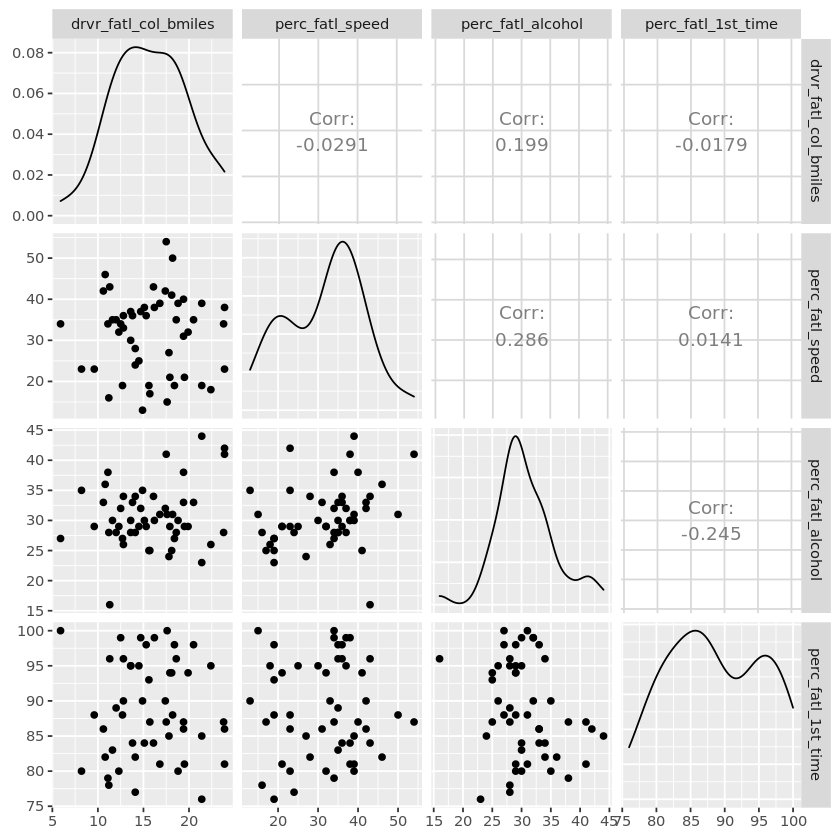

In [9]:
# Compute summary statistics of all columns in the car_acc data frame
dat_summ <- summary(car_acc)
print(dat_summ)

# Deselect the state column and create a pairwise scatterplot
library(GGally)
car_acc %>% 
    select(-state) %>%
    ggpairs()

## 4. Quantify the association of features and accidents
<p>We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).</p>
<p>To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:</p>
<ul>
<li>0.2 = weak</li>
<li>0.5 = medium</li>
<li>0.8 = strong</li>
<li>0.9 = very strong</li>
</ul>

In [11]:
# Use the pipe operator and first remove the state column and then compute the correlation coefficient for all column-pairs 
corr_col <- car_acc %>% select(-state) %>% cor()
print(corr_col)

                     drvr_fatl_col_bmiles perc_fatl_speed perc_fatl_alcohol
drvr_fatl_col_bmiles           1.00000000     -0.02908015         0.1994263
perc_fatl_speed               -0.02908015      1.00000000         0.2862442
perc_fatl_alcohol              0.19942634      0.28624417         1.0000000
perc_fatl_1st_time            -0.01794188      0.01406622        -0.2454551
                     perc_fatl_1st_time
drvr_fatl_col_bmiles        -0.01794188
perc_fatl_speed              0.01406622
perc_fatl_alcohol           -0.24545506
perc_fatl_1st_time           1.00000000


## 5. Fit a multivariate linear regression
<p>From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.</p>
<p>Both the multivariate regression and the correlation measure how strongly the features are associated with the outcome (fatal accidents). When comparing the regression coefficients with the correlation coefficients, we will see that they are slightly different. The reason for this is that the multiple regression computes the association of a feature with an outcome, given the association with all other features, which is not accounted for when calculating the correlation coefficients.</p>
<p>A particularly interesting case is when the correlation coefficient and the regression coefficient of the same feature have opposite signs. How can this be? For example, when a feature A is positively correlated with the outcome Y but also positively correlated with a different feature B that has a negative effect on Y, then the indirect correlation (A-&gt;B-&gt;Y) can overwhelm the direct correlation (A-&gt;Y). In such a case, the regression coefficient of feature A could be positive, while the correlation coefficient is negative. This is sometimes called a <em>masking</em> relationship. Let’s see if the multivariate regression can reveal such a phenomenon.</p>

In [13]:
# Use lm to fit a multivariate linear regression model 
fit_reg <- lm( drvr_fatl_col_bmiles ~ perc_fatl_speed + perc_fatl_alcohol + perc_fatl_1st_time , data=car_acc )
# Retrieve the regression coefficients from the model fit
fit_coef <- coef(fit_reg)
print(fit_coef)

       (Intercept)    perc_fatl_speed  perc_fatl_alcohol perc_fatl_1st_time 
        9.06498048        -0.04180041         0.19086404         0.02473301 


## 6. Perform PCA on standardized data
<p>We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between  alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.</p>
<p>One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).</p>
<p>We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.</p>

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


   Comp.2 
0.7946979 


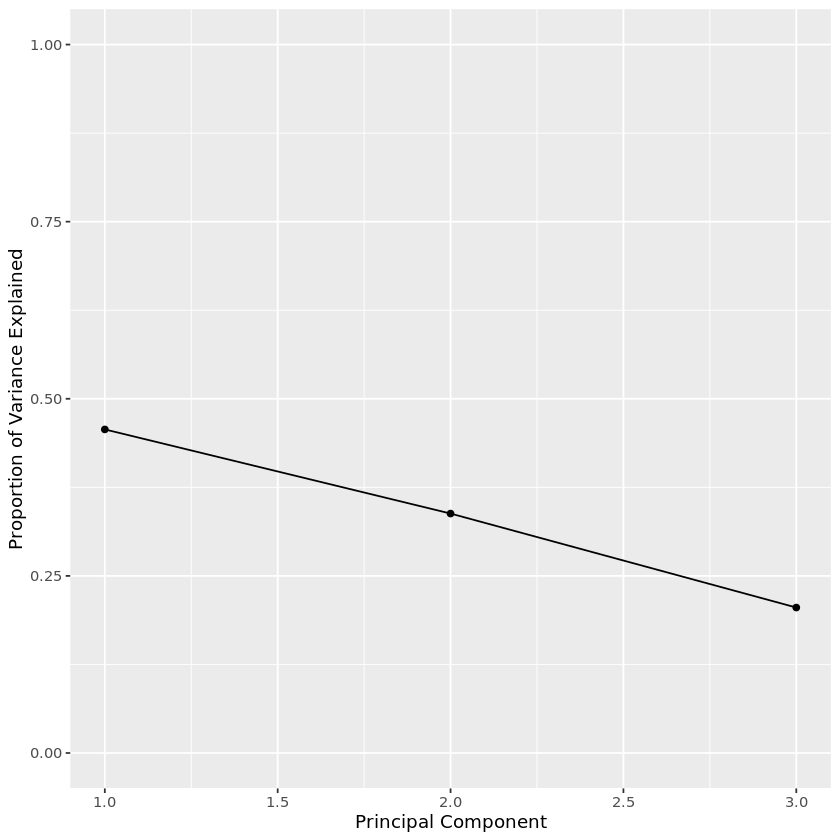

In [15]:
# Center and standade the three feature columns
car_acc_standised <- car_acc %>% 
                mutate( perc_fatl_speed=scale(perc_fatl_speed),
                        perc_fatl_alcohol=scale(perc_fatl_alcohol),
                        perc_fatl_1st_time=scale(perc_fatl_1st_time) )

# Perform PCA on standadized features (column 3,4,5 of car_acc_standised)
pca_fit <- princomp( car_acc_standised[,c(3,4,5)]  )

# Obtain the proportion of variance explained by each principle component
pr_var <- pca_fit$sdev^2
pve <- pr_var/sum(pr_var)

# Plot the proportion of variance explained
data_frame( comp_id=1:length(pve) , pve ) %>%
ggplot( aes(x=comp_id , y=pve) ) + geom_line() + geom_point() +
coord_cartesian(ylim=c(0,1)) +
labs(x="Principal Component", 
    y="Proportion of Variance Explained")

# Get the cumulative variance explained by the first 2 principle components
cve <- cumsum(pve)
cve_pc2 <- cve[2]
print(cve_pc2)

## 7. Visualize the first two principal components
<p>The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents. This enables us to use our eyes to try to discern patterns in the data with the goal to find groups of similar states. Although clustering algorithms are becoming increasingly efficient, human pattern recognition is an easily accessible and very efficient method of assessing patterns in data.</p>
<p>We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.</p>

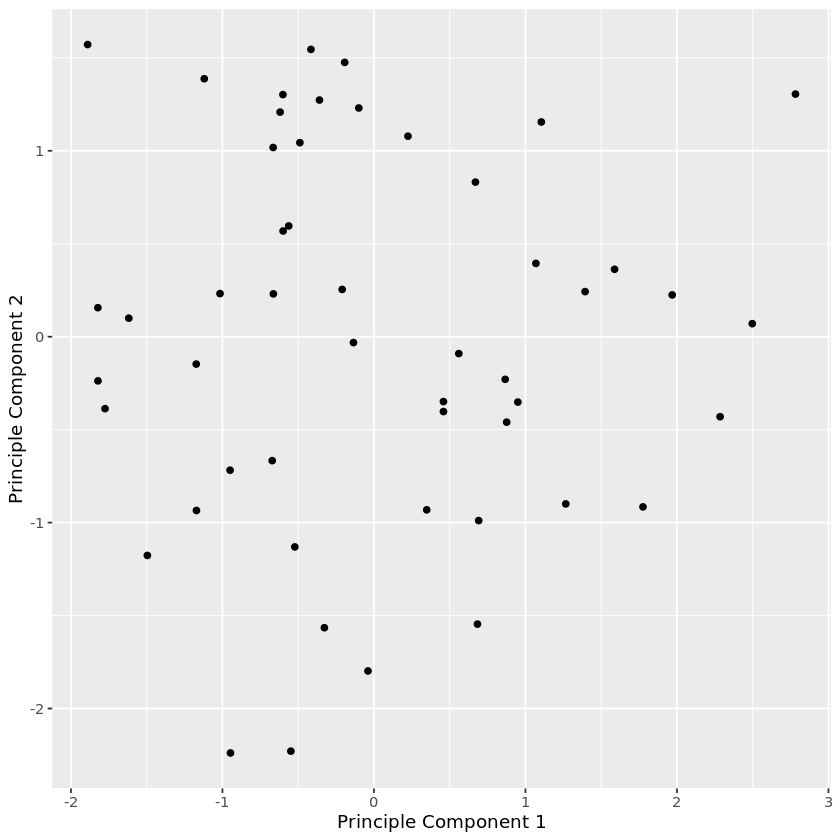

In [17]:
# Get the principle component scores from the PCA fit
pcomp1 <- pca_fit$scores[,1]
pcomp2 <- pca_fit$scores[,2]

# Plot the first 2 principle components in a scatterplot and add axis labels
data_frame(pcomp1,pcomp2) %>%
ggplot(aes(x=pcomp1,y=pcomp2)) +geom_point() +
labs(x="Principle Component 1",
    y="Principle Component 2")

## 8. Find clusters of similar states in the data
<p>It was not entirely clear from the PCA scatter plot how many groups in which the states cluster. To assist with identifying a reasonable number of clusters, we can use KMeans clustering by creating a scree plot and finding the "elbow", which is an indication of when the addition of more clusters does not add much explanatory power.</p>

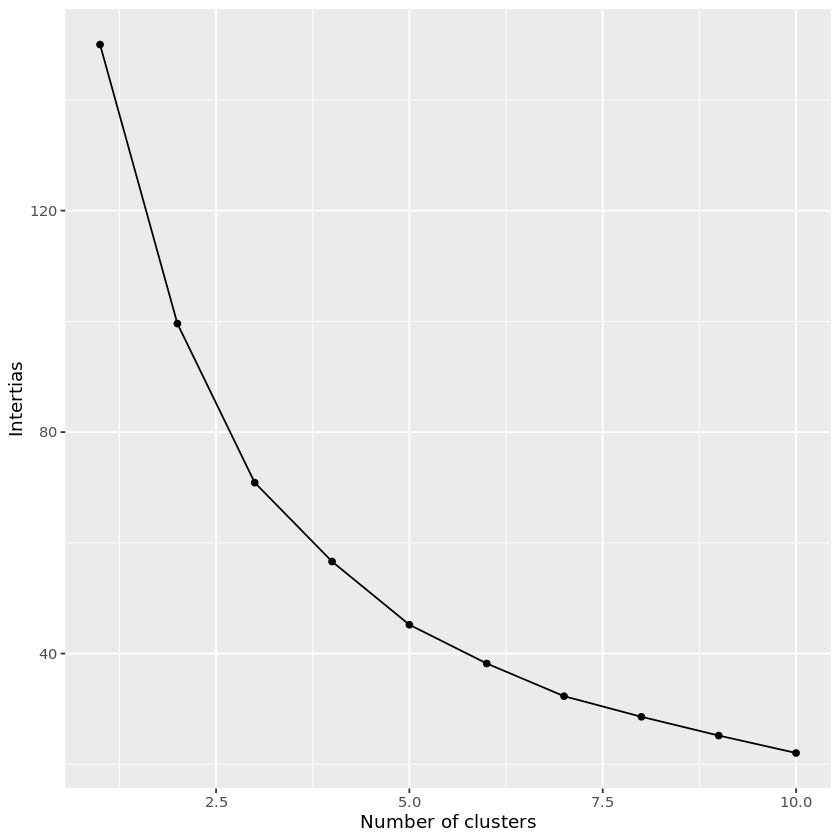

In [19]:
# create a vector of 1 to 10 clusters
k_vec <- 1:10
# initialise vector of inertias, or within-cluster sum-of-squares
inertias <- rep(NA, length(k_vec))
# initialise empty list to save K-mean fits 
mykm <- list()
# set the seed of random number generator 
set.seed(1)
for (k in k_vec) {
    # for each k, fit a K-mean model with k clusters and save it in the mykm list
                mykm[[k]] <- kmeans( car_acc_standised[,c(3,4,5)] , centers=k , nstart=50  )
    # for each k, get the within-cluster sum-of-squares and save
                inertias[k] <- mykm[[k]]$tot.withinss             
}
# plot the within-cluster sum-of-squares against the number of clusters used
data_frame(k_vec,inertias) %>%
ggplot( aes(x=k_vec,y=inertias) ) +
geom_point() + geom_line() +
labs(x="Number of clusters", y="Intertias")

## 9. KMeans to visualize clusters in the PCA scatter plot
<p>Since there wasn't a clear elbow in the scree plot, assigning the states to either two or three clusters is a reasonable choice, and we will resume our analysis using three clusters. Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.</p>

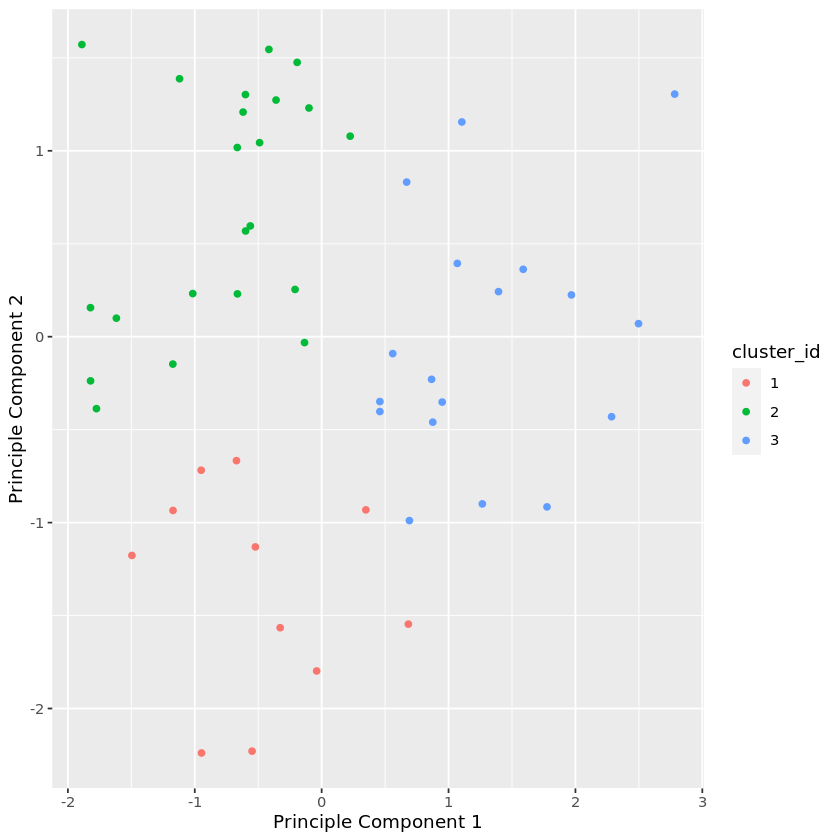

In [21]:
# Obtain cluster-ids from the kmeans fit with k=3
cluster_id <- as.factor(mykm[[3]]$cluster)
# Color the points of the principle component plot according to their cluster number
data_frame(pcomp1,pcomp2) %>%
ggplot(aes(x=pcomp1,y=pcomp2)) + geom_point(aes(color=cluster_id)) +
labs(x="Principle Component 1",
    y="Principle Component 2")

## 10. Visualize the feature differences between the clusters
<p>Thus far, we have used both our visual interpretation of the data and the KMeans clustering algorithm to reveal patterns in the data, but what do these patterns mean?</p>
<p>Remember that the information we have used to cluster the states into three distinct groups are the percentage of drivers speeding, under alcohol influence and that has not previously been involved in an accident. We used these clusters to visualize how the states group together when considering the first two principal components. This is good for us to understand structure in the data, but not always easy to understand, especially not if the findings are to be communicated to a non-specialist audience.</p>
<p>A reasonable next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering. Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.</p>

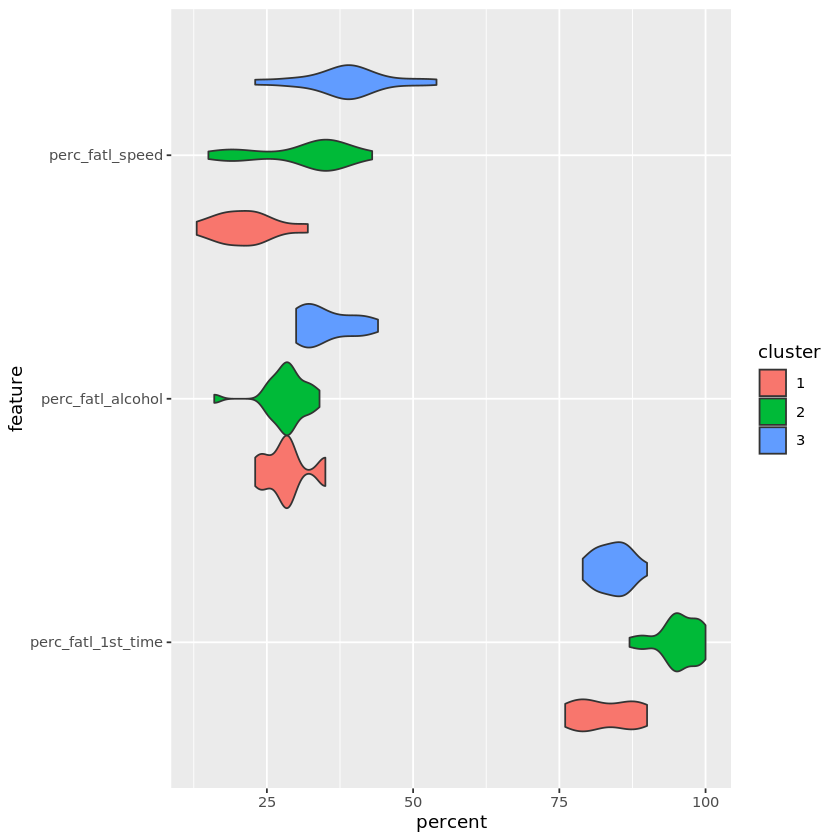

In [23]:
# add the cluster_id into the original data frame
car_acc$cluster <- cluster_id

# use the pipe operator on the car_acc data frame to first remove the drvr_fatl_col_bmiles column,
# then convert the data frame into a long format and then create a violin plot using ggplot
car_acc %>%  select(-drvr_fatl_col_bmiles) %>% 
                gather(key=feature,value=percent,-state,-cluster) %>% 
                ggplot( aes(x=feature,y=percent , fill=cluster) ) +
                geom_violin( ) +
                coord_flip()

## 11. Compute the number of accidents within each cluster
<p>Now it is clear that different groups of states may require different interventions. Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first. Which group would this be? To determine this, we will include data on how many miles are driven in each state, because this will help us to compute the total number of fatal accidents in each state. Data on miles driven is available in another tab-delimited text file. We will assign this new information to a column in the data frame and create a violin plot for how many total fatal traffic accidents there are within each state cluster.</p>

Rows: 51 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (1): state
dbl (1): million_miles_annually


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 3 x 4
  cluster count  mean    sum
  <fct>   <int> <dbl>  <dbl>
1 1          11  861.  9466.
2 2          22  898. 19764.
3 3          18  911. 16405.


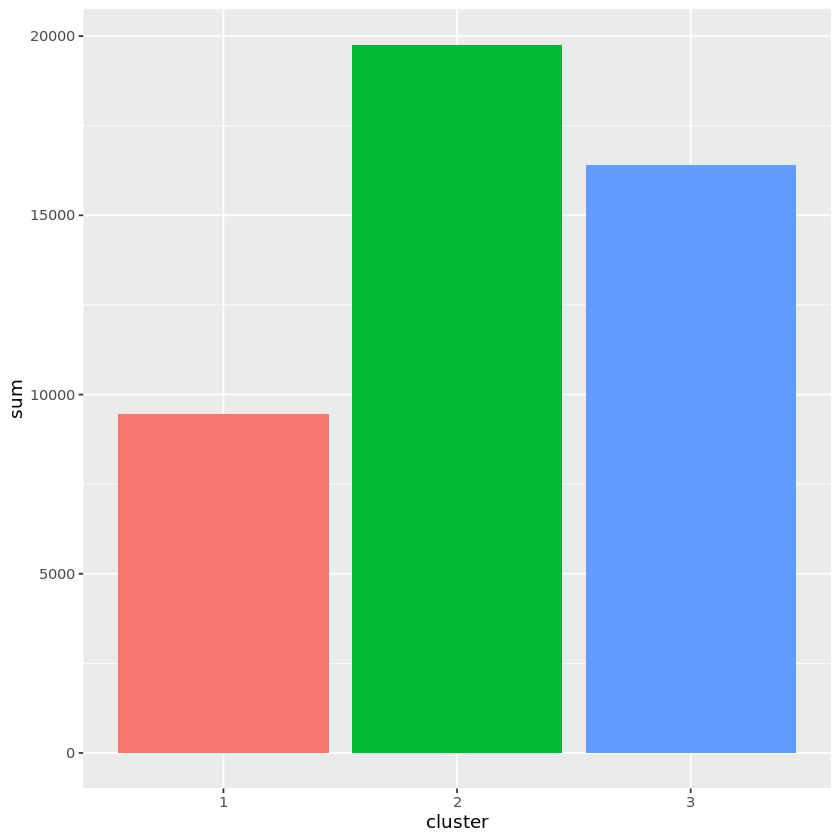

In [25]:
# reading in the miles-driven.csv file
miles_driven <- read_delim( file="datasets/miles-driven.csv", delim = '|' )
# join miles_driven with car_acc
carr_acc_joined <- left_join(car_acc, miles_driven, by="state") 

# create a new variable that is the total number of deadly accidents
carr_acc_joined <- carr_acc_joined %>% mutate( num_drvr_fatl_col=drvr_fatl_col_bmiles*million_miles_annually/1000 )

# use the pipe operator to groupethe new data frame, select relevant variables and summarise 
carr_acc_joined_summ <- carr_acc_joined %>% group_by(cluster) %>% select(cluster,num_drvr_fatl_col) %>% 
                summarise(count=n(),
                          mean=mean(num_drvr_fatl_col),
                          sum=sum(num_drvr_fatl_col))
print(carr_acc_joined_summ)

# Compare the total fatal accident sum across clusters using a bar plot
carr_acc_joined_summ %>% ggplot( aes(x=cluster,y=sum) ) +
                geom_bar( aes(fill=cluster), stat = "identity" , show.legend = F )


## 12. Make a decision when there is no clear right choice
<p>As we can see, there is no obvious correct choice regarding which cluster is the most important to focus on. Yet, we can still argue for a certain cluster and motivate this using our findings above. Which cluster do you think should be a focus for policy intervention and further investigation?</p>

In [27]:
# Which cluster would you choose?
cluster_num <- sample(1:3,size=1)
print(cluster_num)

[1] 2
